In [1]:
# import necerssary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
# to build linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [2]:
# load dataset
data_1= pd.read_csv("WHO_life_expectancy1.csv")
data_1.head(5)


,Country,Year,Status,Life expectancy,Adult mortality,infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data_c= data_1.dropna()

In [4]:
#
data_c.dtypes


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                    float64
infant deaths                        int64
Alcohol                            float64
Percentage Expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
column_names = data_c.columns

# Print the column names
print(column_names)


Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'infant deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


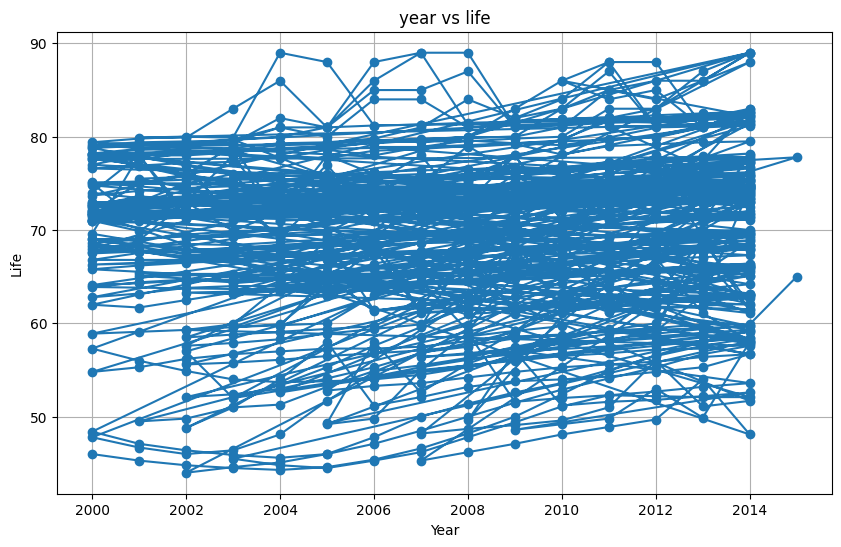

In [6]:
x_column = 'Year'  # Replace 'Your_X_Column_Name' with the actual column name you want as the x-axis

# Access the data from the specified x-axis column
x_data = data_c[x_column]

# Create a plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(x_data, data_c['Life expectancy'], marker='o', linestyle='-')
plt.xlabel(x_column)
plt.ylabel('Life')
plt.title('year vs life')
plt.grid(True)

# Show the plot
plt.show()

In [7]:
# Assuming you have a DataFrame 'data' and want to map numbers to unique countries in the 'Country' column
data_c['Country_ID'] = pd.factorize(data_c['Country'])[0]

# Display the mapping
print(data_c[['Country', 'Country_ID']].drop_duplicates())

          Country  Country_ID
0     Afghanistan           0
16        Albania           1
33        Algeria           2
49         Angola           3
81      Argentina           4
...           ...         ...
2811      Uruguay         128
2827   Uzbekistan         129
2843      Vanuatu         130
2907       Zambia         131
2923     Zimbabwe         132

[133 rows x 2 columns]


C:\Users\Acer Aspire E5-575G\AppData\Local\Temp\ipykernel_7024\3778361734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c['Country_ID'] = pd.factorize(data_c['Country'])[0]


In [8]:
import pandas as pd

# Assuming you have a DataFrame 'data_c' and want to map numbers to unique countries in the 'Country' column
data_c['Country_ID'] = pd.factorize(data_c['Country'])[0]

def find_country_id(country_name, data):
    """
    Find the Country_ID based on the given country name.

    Parameters:
    - country_name (str): The name of the country.
    - data (pd.DataFrame): The DataFrame containing the mapping.

    Returns:
    - int or None: The Country_ID if found, else None.
    """
    country_id_series = data[data['Country'] == country_name]['Country_ID']
    if not country_id_series.empty:
        return country_id_series.values[0]
    else:
        return None

# Get user input for the country name
user_input_country = input("Enter the country name: ")

# Find the Country_ID based on user input
result_country_id = find_country_id(user_input_country, data_c)

if result_country_id is not None:
    print(f"The Country_ID for {user_input_country} is {result_country_id}")
else:
    print(f"Country not found in the DataFrame.")




C:\Users\Acer Aspire E5-575G\AppData\Local\Temp\ipykernel_7024\1258706286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c['Country_ID'] = pd.factorize(data_c['Country'])[0]


Country not found in the DataFrame.


In [9]:
features = [ 'Country_ID','Year', 'Adult mortality',
       'infant deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']
target = 'Life expectancy'

In [10]:
X = data_c[features]
y = data_c[target]


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Build and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 13.08
R-squared (R2) Score: 0.82


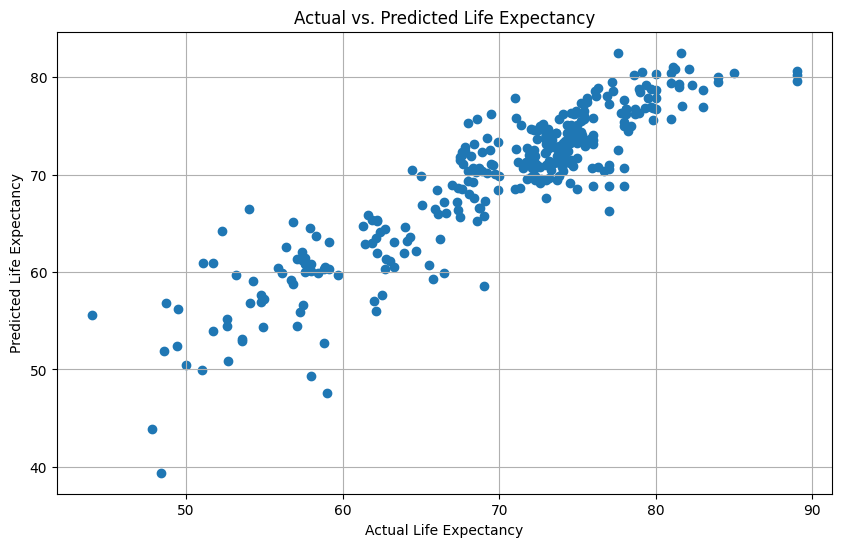

In [16]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy")
plt.grid(True)

plt.show()

In [17]:
# Number of iterations
num_iterations = 100  # You can change this to the desired number of iterations

for iteration in range(num_iterations):
    # Split the data into training and testing sets randomly (you can adjust the test_size and random_state)
    train_data = data_c.sample(frac=0.8, random_state=iteration)  # 80% training data
    test_data = data_c.drop(train_data.index)  # 20% testing data

    # Extract features and target from both the training and testing datasets
    X_train = train_data[features]
    y_train = train_data[target]

    X_test = test_data[features]
    y_test = test_data[target]

    # Build and train a linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance on the testing data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Iteration {iteration + 1}:")
    print(f"Mean Squared Error (MSE) on Testing Data: {mse:.2f}")
    print(f"R-squared (R2) Score on Testing Data: {r2:.2f}")
    print("")

# Save the trained model to a file for future use
model_filename = 'life_expectancy_model.pkl'
joblib.dump(model, model_filename)

Iteration 1:
Mean Squared Error (MSE) on Testing Data: 14.45
R-squared (R2) Score on Testing Data: 0.79

Iteration 2:
Mean Squared Error (MSE) on Testing Data: 15.28
R-squared (R2) Score on Testing Data: 0.82

Iteration 3:
Mean Squared Error (MSE) on Testing Data: 14.88
R-squared (R2) Score on Testing Data: 0.81

Iteration 4:
Mean Squared Error (MSE) on Testing Data: 14.22
R-squared (R2) Score on Testing Data: 0.80

Iteration 5:
Mean Squared Error (MSE) on Testing Data: 13.13
R-squared (R2) Score on Testing Data: 0.83

Iteration 6:
Mean Squared Error (MSE) on Testing Data: 13.44
R-squared (R2) Score on Testing Data: 0.84

Iteration 7:
Mean Squared Error (MSE) on Testing Data: 13.98
R-squared (R2) Score on Testing Data: 0.83

Iteration 8:
Mean Squared Error (MSE) on Testing Data: 12.25
R-squared (R2) Score on Testing Data: 0.84

Iteration 9:
Mean Squared Error (MSE) on Testing Data: 14.90
R-squared (R2) Score on Testing Data: 0.80

Iteration 10:
Mean Squared Error (MSE) on Testing Data:

['life_expectancy_model.pkl']

In [18]:
import joblib

# Load the trained model from the .pkl file
model = joblib.load('life_expectancy_model.pkl')  # Replace with the actual path to your model file

0

# Collect user input for feature values
user_input = {}
for feature in features:
    user_input[feature] = float(input(f"Enter value for {feature}: "))

# Create a DataFrame from the user input
import pandas as pd
user_data = pd.DataFrame([user_input])

# Use the model to make predictions
life_expectancy_prediction = model.predict(user_data)
print(f"Predicted Life Expectancy: {life_expectancy_prediction[0]:.2f}")


Predicted Life Expectancy: 75.82


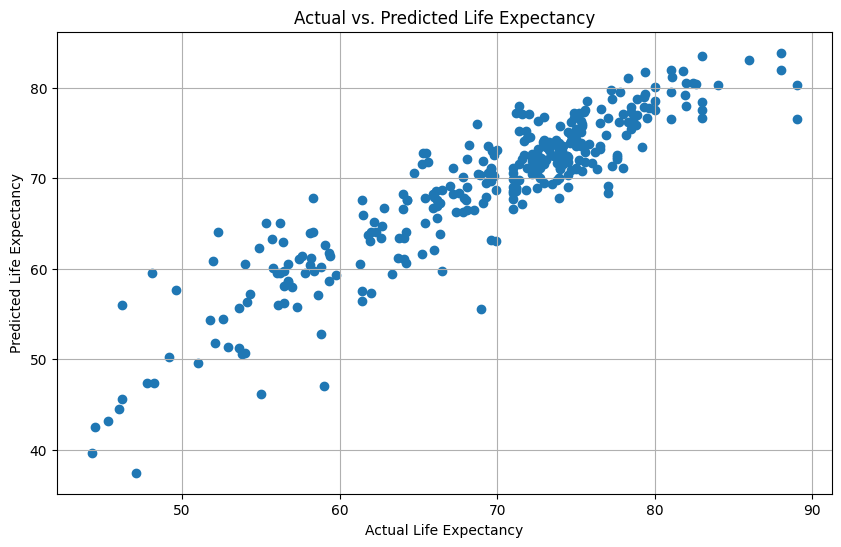

In [19]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy")
plt.grid(True)

plt.show()

In [20]:
# Assuming y_true is the true life expectancy values and y_pred is the predicted values
y_true = data_c['Life expectancy']
# Make sure to include all the features used during training
features_used_for_prediction = ['Country_ID', 'Year', 'Adult mortality', 'infant deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B', 'Measles','BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
y_pred = model.predict(data_c[features_used_for_prediction])

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Mean Squared Error (MSE): 12.59
R-squared (R2) Score: 0.84
Mean Absolute Error (MAE): 2.71


In [21]:
# Assuming y_true is the true life expectancy values and y_pred is the predicted values
y_true = data_c['Life expectancy']
# Make sure to include all the features used during training
features_used_for_prediction = ['Country_ID', 'Year', 'Adult mortality', 'infant deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B', 'Measles','BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
y_pred = model.predict(data_c[features_used_for_prediction])

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Mean Squared Error (MSE): 12.59
R-squared (R2) Score: 0.84
Mean Absolute Error (MAE): 2.71


In [22]:
# Assuming y_true is the true life expectancy values and y_pred is the predicted values
threshold = 1.0  # Define a threshold

# Calculate the percentage of predictions within the threshold
accuracy = np.mean(np.abs(y_true - y_pred) < threshold) * 100

print(f'Accuracy within {threshold} years: {accuracy:.2f}%')


Accuracy within 1.0 years: 23.89%
